In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv(r'C:\Users\shasw\Downloads\ML Workshop\matches.csv')
deliveries = pd.read_csv(r'C:\Users\shasw\Downloads\ML Workshop\deliveries.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Toss Decision

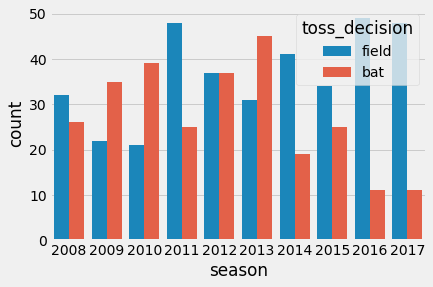

<Figure size 720x720 with 0 Axes>

In [22]:
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.figure(figsize=(10,10))
plt.show()

## Is Toss Winner Also the Match Winner?

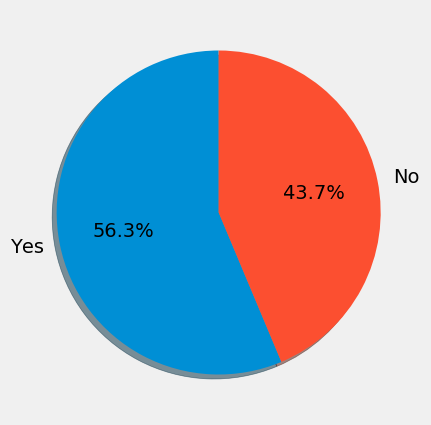

In [69]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

## Total Runs in Every Seasons

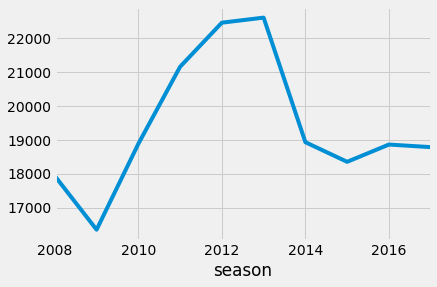

In [20]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum()
season.plot()
plt.show()

## MI vs CSK

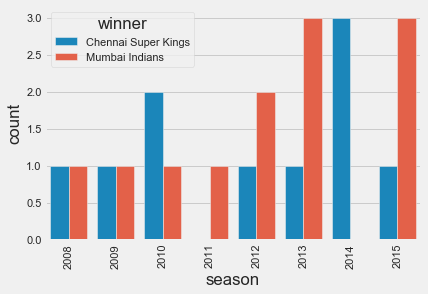

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
mt2=matches[((matches['team1']=='Mumbai Indians')|(matches['team2']=='Mumbai Indians'))&((matches['team1']=='Chennai Super Kings')|(matches['team2']=='Chennai Super Kings'))]
sns.countplot(x='season', hue='winner', data=mt2)
mlt.xticks(rotation='vertical')
mlt.show()

## Highest Scores

In [24]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
522,259,1,Delhi Daredevils,Kings XI Punjab,231
981,486,1,Kings XI Punjab,Chennai Super Kings,231
100,50,1,Kings XI Punjab,Mumbai Indians,230
1170,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,227


## Chance of Chasing 200+ scores

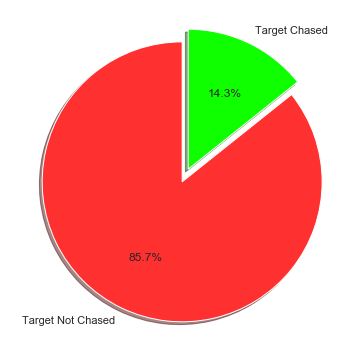

In [51]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['Target Not Chased','Target Chased']
mlt.pie(slices,labels=labels,colors=['#FF3030', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

## Top Batsmen

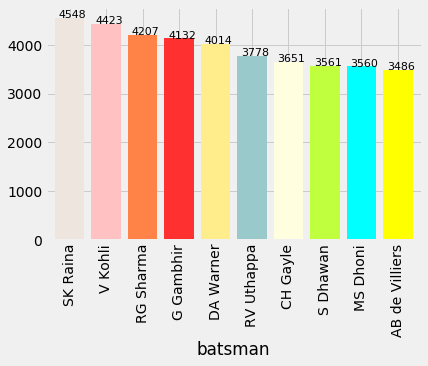

In [26]:
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
colors = ['#EEE5DE','#FFC1C1','#FF8247','#FF3030','#FFEC8B','#9AC9CB','#FFFFE0','#C0FF3E','#00FFFF','#FFFF00','#C4C4C4']
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=11)
mlt.show()

## Top Bowlers

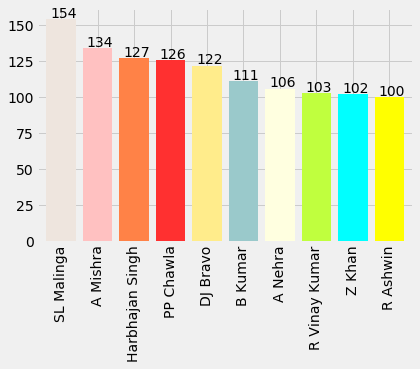

In [10]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
mlt.show()

## Extras

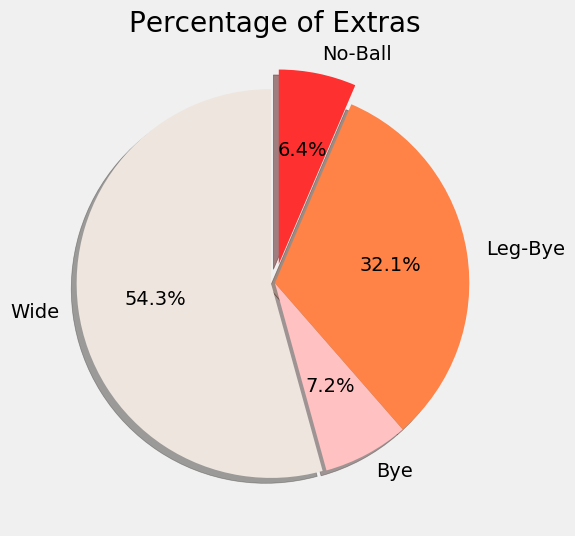

In [68]:
plt.style.use('fivethirtyeight')
extras=deliveries[['wide_runs','bye_runs','legbye_runs','noball_runs']].sum()
sizes=[5161,680,3056,612]
mlt.pie(sizes, labels=['Wide','Bye','Leg-Bye','No-Ball'],
        colors = ['#EEE5DE','#FFC1C1','#FF8247','#FF3030','#FFEC8B','#9AC9CB','#FFFFE0','#C0FF3E','#00FFFF','#FFFF00','#C4C4C4'],explode=(0.02,0,0,0.1),autopct='%1.1f%%', shadow=True, startangle=90)
mlt.title("Percentage of Extras")
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.plot()
mlt.show()

## Total Wins By Each Team

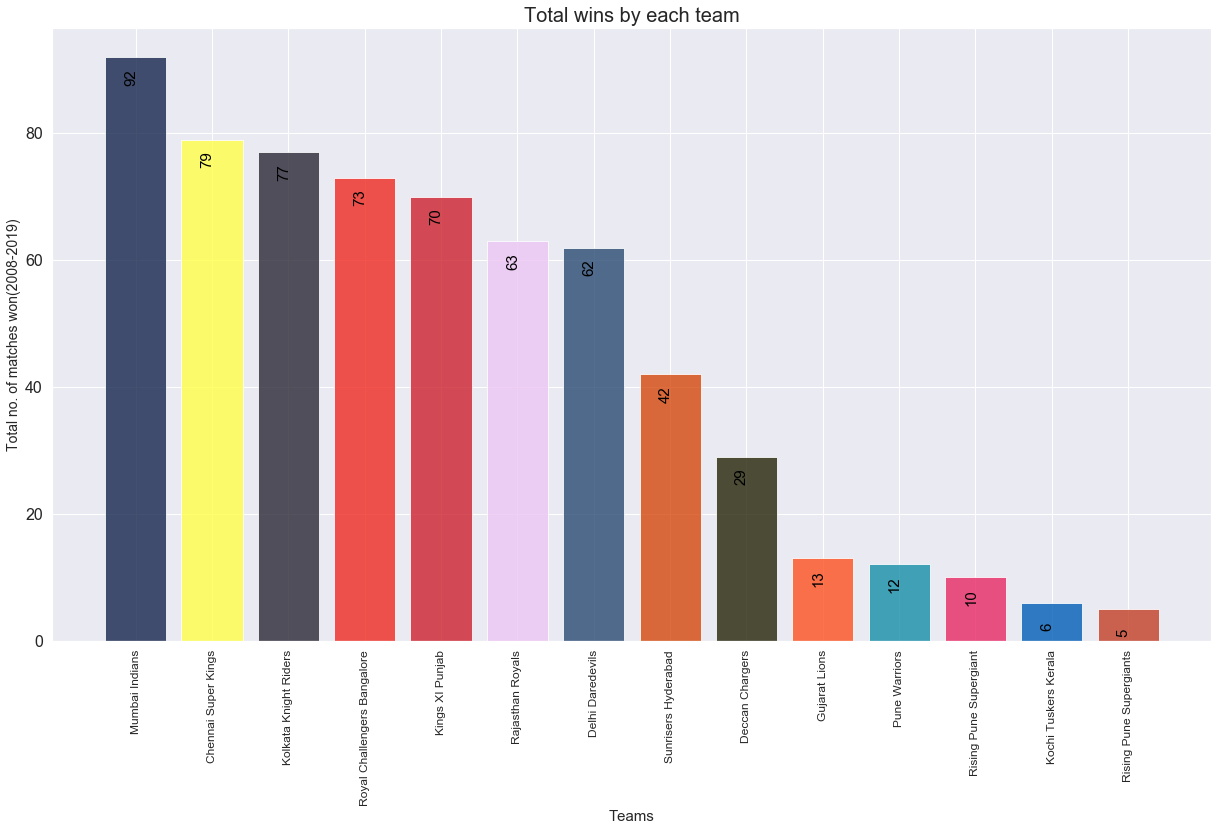

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(matches['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

## Top Players with most "Man of the match" awards

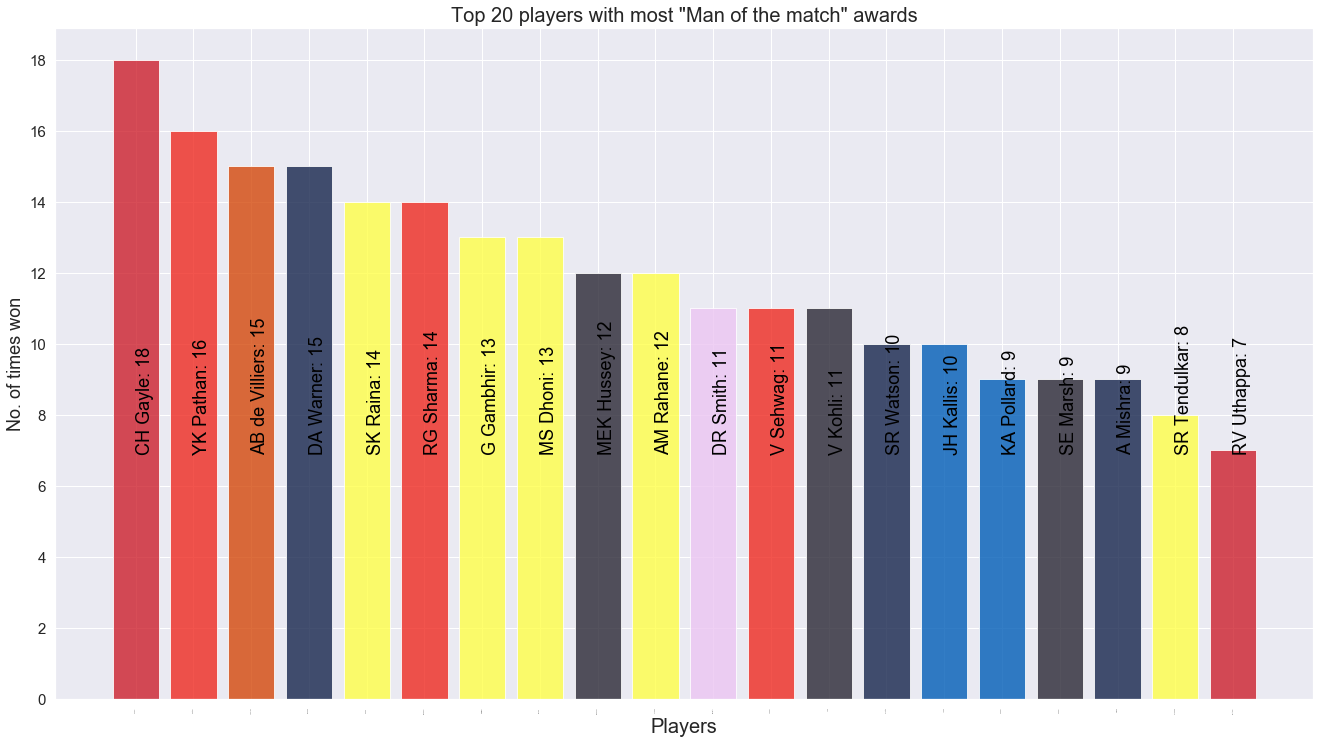

In [41]:
players=pd.DataFrame(matches['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

## Biggest Win(by runs) per Season

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


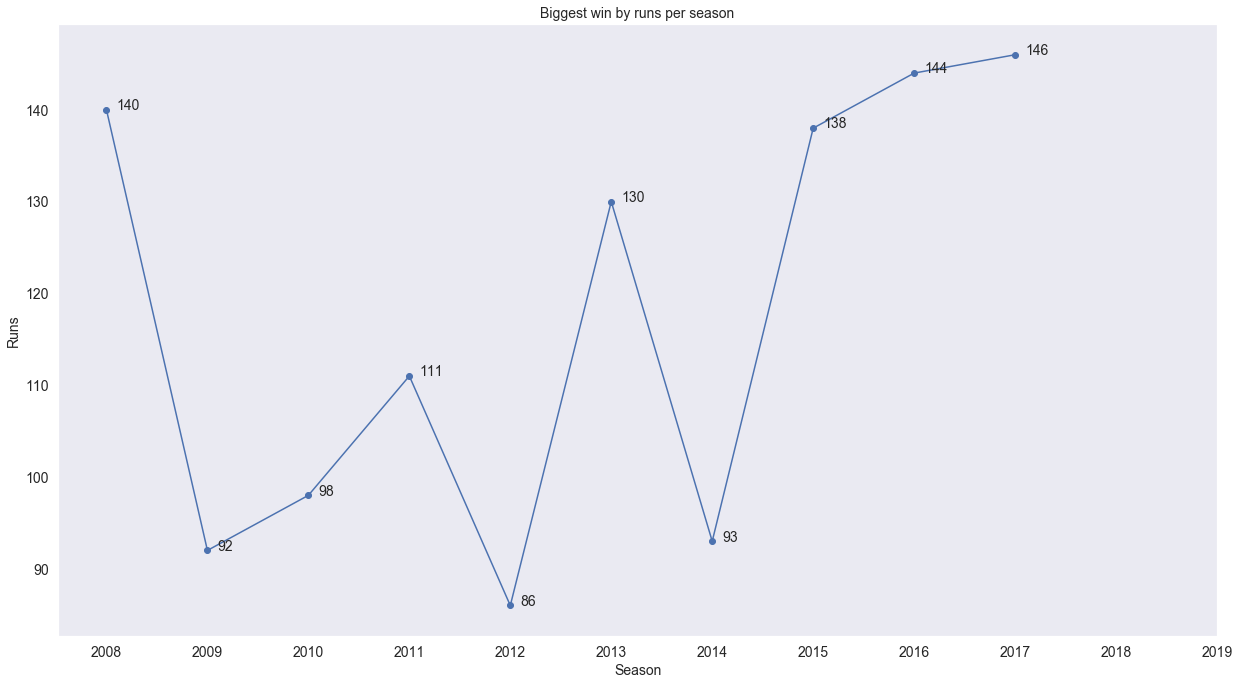

In [56]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(matches[matches['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

## Performance of Top Batsmen

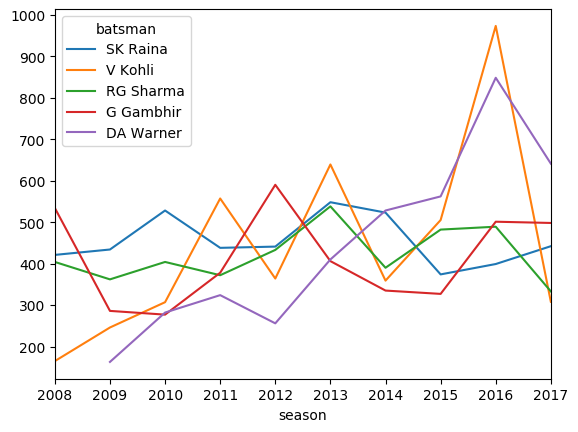

In [67]:
plt.rcdefaults()
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot()
mlt.show()

## Winning Percentage of Teams by Large Margin

Text(0, -0.3, 'Winning percentage of teams by large margin(more than 50 runs or by more than 8 wickets)')

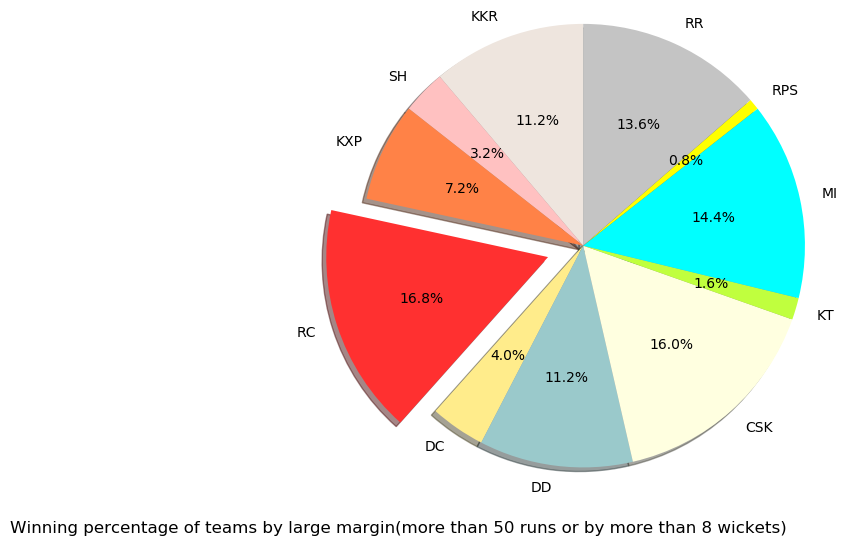

In [62]:
plt.rcdefaults()
labels = ['KKR','SH','KXP','RC','DC','DD','CSK','KT','MI','RPS','RR']
sizes = [14, 4, 9, 21, 5, 14 , 20 ,2 ,18 ,1 , 17]
colors = ['#EEE5DE','#FFC1C1','#FF8247','#FF3030','#FFEC8B','#9AC9CB','#FFFFE0','#C0FF3E','#00FFFF','#FFFF00','#C4C4C4']
explode = (0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 7th slice (i.e. 'RC')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,radius=1.5)
plt.title("Winning percentage of teams by large margin(more than 50 runs or by more than 8 wickets)",x=0,y=-0.3)

#Percentage of wins by team which is greater than or equal to 50 runs or by grater than or equal to 8 wickets

## Overall Performance of Teams

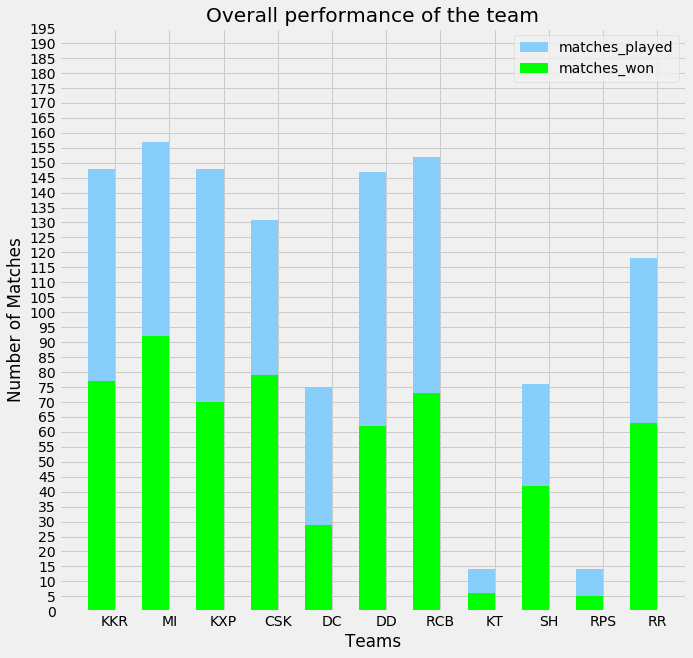

In [19]:

matches_played_KKR=matches[(matches['team1']=='Kolkata Knight Riders') | (matches['team2']=='Kolkata Knight Riders')]
matches_played_MI=matches[(matches['team1']=='Mumbai Indians') | (matches['team2']=='Mumbai Indians')]
matches_played_KXP=matches[(matches['team1']=='Kings XI Punjab') | (matches['team2']=='Kings XI Punjab')]
matches_played_CSK=matches[(matches['team1']=='Chennai Super Kings') | (matches['team2']=='Chennai Super Kings')]
matches_played_DC=matches[(matches['team1']=='Deccan Chargers') | (matches['team2']=='Deccan Chargers')]
matches_played_DD=matches[(matches['team1']=='Delhi Daredevils') | (matches['team2']=='Delhi Daredevils')]
matches_played_RCB=matches[(matches['team1']=='Royal Challengers Bangalore') | (matches['team2']=='Royal Challengers Bangalore')]
matches_played_KT=matches[(matches['team1']=='Kochi Tuskers Kerala') | (matches['team2']=='Kochi Tuskers Kerala')]
matches_played_SH=matches[(matches['team1']=='Sunrisers Hyderabad') | (matches['team2']=='Sunrisers Hyderabad')]
matches_played_RPS=matches[(matches['team1']=='Rising Pune Supergiants') | (matches['team2']=='Rising Pune Supergiants')]
matches_played_RR=matches[(matches['team1']=='Rajasthan Royals') | (matches['team2']=='Rajasthan Royals')]
A=matches_played_KKR['id'].count()
B=matches_played_MI['id'].count()
C=matches_played_KXP['id'].count()
D=matches_played_CSK['id'].count()
E=matches_played_DC['id'].count()
F=matches_played_DD['id'].count()
G=matches_played_RCB['id'].count()
H=matches_played_KT['id'].count()
I=matches_played_SH['id'].count()
J=matches_played_RPS['id'].count()
K=matches_played_RR['id'].count()

matches_won_KKR=matches[matches['winner']=='Kolkata Knight Riders']
matches_won_MI=matches[matches['winner']=='Mumbai Indians']
matches_won_KXP=matches[matches['winner']=='Kings XI Punjab']
matches_won_CSK=matches[matches['winner']=='Chennai Super Kings']
matches_won_DC=matches[matches['winner']=='Deccan Chargers']
matches_won_DD=matches[matches['winner']=='Delhi Daredevils']
matches_won_RCB=matches[matches['winner']=='Royal Challengers Bangalore']
matches_won_KT=matches[matches['winner']=='Kochi Tuskers Kerala']
matches_won_SH=matches[matches['winner']=='Sunrisers Hyderabad']
matches_won_RPS=matches[matches['winner']=='Rising Pune Supergiants']
matches_won_RR=matches[matches['winner']=='Rajasthan Royals']


O=matches_won_KKR['id'].count()
P=matches_won_MI['id'].count()
Q=matches_won_KXP['id'].count()
R=matches_won_CSK['id'].count()
S=matches_won_DC['id'].count()
T=matches_won_DD['id'].count()
U=matches_won_RCB['id'].count()
V=matches_won_KT['id'].count()
W=matches_won_SH['id'].count()
X=matches_won_RPS['id'].count()
Y=matches_won_RR['id'].count()


n_bins = 11
ind = np.arange(n_bins)
width = 0.50

plt.figure(figsize=(10,10))

matches_played=[A,B,C,D,E,F,G,H,I,J,K]
matches_won=[O,P,Q,R,S,T,U,V,W,X,Y]

p1 = plt.bar(ind, matches_played, width, color='LightSkyBlue')
p2 = plt.bar(ind, matches_won, width, color='Lime')

plt.ylabel('Number of Matches')
plt.xlabel('Teams')
plt.title('Overall performance of the team')
plt.xticks(ind + width/2., ('KKR', 'MI', 'KXP', 'CSK', 'DC', 'DD', 'RCB', 'KT', 'SH', 'RPS', 'RR'))
plt.yticks(np.arange(0, 200, 5))
plt.legend((p1[0], p2[0]), ('matches_played', 'matches_won'))